In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Olímpiadas de 2020 e Equidade de Gênero

As Olímpiadas de verão de 2020 foram um marco para a equidade de gênero, em toda a história nunca houve uma participação tão igualitária entre os sexos e isso vários jornais:

<img src="./Imagens/Noticiario.png" width="500">

Que tal entendermos isso através de dados. A seguir iremos avaliar a participação feminina ao longo de todos os jogos olímpicos de verão da idade moderna, e entender a evolução até o marco atual.

**Fonte dos dados**  
Usarei dois datasets diferentes:
  1. "120 Years of Olympic History, Athletes and Results": contém toda a série histórica das olímpiadas de verão e inverno até 2016;
  2. "Tokyo Olympics 2020(2021) Dataset": contém os dados da última olímpiada de verão.

In [2]:
olympics = pd.read_csv('Dados/athlete_events.csv')
ol2020 = pd.read_excel('Dados/EntriesGender.xlsx')

In [3]:
# Analisaremos apenas os jogos de verão
summerGames = olympics.loc[olympics['Season'] == 'Summer']

---

### Primeira Olimpíada

In [4]:
fFirstOlympic = summerGames['Year'] == summerGames['Year'].min()
firstOlympic = summerGames.loc[fFirstOlympic]

In [5]:
# Comitês participantes
firstOlympic.loc[:,'NOC'].unique()

array(['GRE', 'GBR', 'SUI', 'USA', 'GER', 'FRA', 'HUN', 'AUS', 'AUT',
       'DEN', 'ITA', 'SWE'], dtype=object)

In [6]:
# Quantos eventos diferentes ocorreram nos jogos de 1896
len(firstOlympic.loc[:,'Event'].unique())

43

In [7]:
# Contagem do número de nomes diferentes para cada ano dividido por sexo
genderByYear = summerGames[['Year', 'Sex', 'Name']].drop_duplicates().groupby(['Year', 'Sex']).count().unstack().fillna(0)
genderByYear.columns = ['F', 'M']
genderByYear.loc[1896]

F      0.0
M    176.0
Name: 1896, dtype: float64

Ocorreu em 1896 e contou com atletas de 12 países diferentes, 43 diferentes modalidades e nenhuma mulher.

---

### Primeira participação feminina em uma Olimpíada

A primeira aparição (e também campeã) feminina em um jogo olímpico foi Hélène de Pourtalès, em 22 de maio 1900, competindo na caravela. Apenas 23 mulheres competiram na segunda Olímpiada com 5 esportes dedicados ao gêneros, data-se desde este período a existência de esportes "apropriados as mulheres".

<img src="./Imagens/Helene.jpg" width="400">

In [8]:
genderByYear.loc[1900]

F      23.0
M    1197.0
Name: 1900, dtype: float64

Esportes que contavam com participação feminina:
 - Golf;
 - Tênis;
 - Caravela;
 - Cróquete;
 - Hipismo.
 
A conquista de novos esportes foi lenta e gradual, a cada evento um ou outro esporte novo era adicionados. Há um artigo completo no wikipedia mostrando toda a história da participação feminina nas Olímpiadas disponíveis neste link:  https://en.wikipedia.org/wiki/Participation_of_women_in_the_Olympics

### Primeira brasileira a competir nas Olímpiadas

In [9]:
brasileira = (summerGames['Sex'] == 'F') & (summerGames['Team'] == 'Brazil')
summerGames.loc[brasileira].sort_values('Year').head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
136660,68718,Maria Emma Hulda Lenk Zigler,F,17.0,168.0,NaN,Brazil,BRA,1932 Summer,1932,Summer,Los Angeles,Swimming,Swimming Women's 100 metres Freestyle,NaN


A primeira representante brasileira a competir nos jogos olímpicos foi Maria Lenk. Iniciou sua vida na natação nadando no rio Tietê por não ter acesso a uma piscina, ela é considerada a pioneira na natação moderna, sendo a primeira mulher a usar em competição o nado borboleta.

<img src="./Imagens/PrimeiraBrasileira.jpg" width="200">

Maria Lenk entrou para o International Swimming Hall of Fame. Foi a primeira brasileira a ser incluída no Hall. Ainda hoje detém diversos recordes mundiais de masters, entrando para o Hall da Fama da Federação Internacional de Natação (FINA) em 1988, quando foi homenageada com o Top Ten da entidade máxima do esporte por ser um dos dez melhores nadadores master do mundo

---

### Participação ao longo do tempo

In [10]:
# Inserindo os dados de 2020 na análise
genderByYear.loc[2020, 'F'] = ol2020['Female'].sum()
genderByYear.loc[2020, 'M'] = ol2020['Male'].sum()

# Análise em percentual divido por gêneros
genderByYear['Total'] = genderByYear['M'] + genderByYear['F']
genderByYear['F%'] = (genderByYear['F'] / genderByYear['Total']) * 100
genderByYear['M%'] = (genderByYear['M'] / genderByYear['Total']) * 100

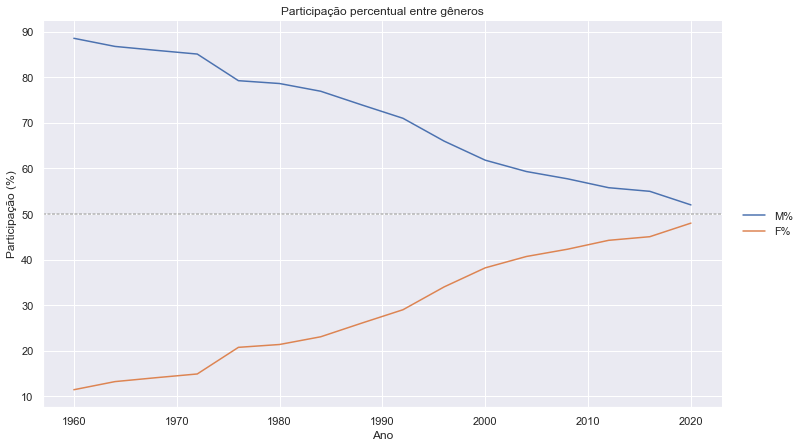

In [11]:
# Sintaxe do seaborn
# Plot da comparação da participação de cada gênero a partir de 1960
g = sns.relplot(data=genderByYear[['M%', 'F%']].query('Year >= 1960'),
                kind='line',
                dashes=False,
                height=6,
                aspect=1.7)

# Linha de referência em 50%
g.map(plt.axhline, y=50, color=".7", dashes=(2, 1))

# Labels
g.set(xlabel='Ano', ylabel='Participação (%)', title='Participação percentual entre gêneros')

plt.show()


**Maiores aumentos no número de competidoras**

In [12]:
# Comparativo entre o ano atual e o anterior
genderByYear['FLag'] = genderByYear['F'].shift(1)
genderByYear['FVar'] = genderByYear['F'] - genderByYear['FLag']
genderByYear['FVar%'] = (genderByYear['F'] - genderByYear['FLag'])/genderByYear['F']

In [13]:
genderByYear[['F', 'FLag', 'FVar', 'FVar%']].sort_values('FVar', ascending=False).head(5)

,F,FLag,FVar,FVar%
Year,,,,
1996,3512.0,2721.0,791.0,0.225228
1988,2202.0,1567.0,635.0,0.288374
2000,4064.0,3512.0,552.0,0.135827
1992,2721.0,2202.0,519.0,0.190739
1984,1567.0,1123.0,444.0,0.283344


Em Tóquio temos um aumento de 401 competidoras a mais que o ano anterior.

In [14]:
genderByYear.loc[2020,['F', 'FLag', 'FVar', 'FVar%']]

F        5432.000000
FLag     5031.000000
FVar      401.000000
FVar%       0.073822
Name: 2020, dtype: float64

**Esportes com menor participação feminina**

In [15]:
bigFemDif = ol2020.loc[:]

# Comparativo de participação percentual entre cada esporte em 2020
bigFemDif['F%'] = [(i/j) * 100 for i,j in zip(bigFemDif['Female'], bigFemDif['Total'])]
bigFemDif['M%'] = [(i/j) * 100 for i,j in zip(bigFemDif['Male'], bigFemDif['Total'])]
bigFemDif['Total%'] = 100

In [16]:
# Seleciona-se apenas os 5 com maiores diferenças
bigFemDifSort = bigFemDif.sort_values('F%').set_index('Discipline')[:5]

# Tradução dos nomes para português
bigFemDifSort = bigFemDifSort.rename({'Wrestling': 'Luta Profissional', 'Cycling Road': 'Ciclismo de Estrada',
                  'Boxing': 'Boxe', 'Equestrian': 'Hipismo'})

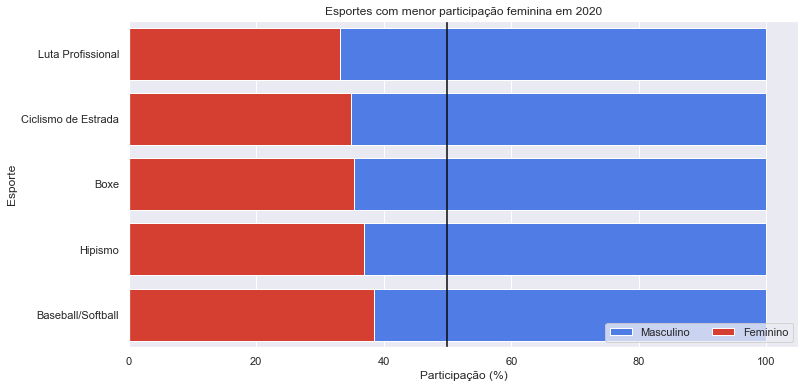

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

# Primeira barra: % masculino em dado esporte, no caso utiliza-se 100% dado a sobreposição
sns.barplot(data=bigFemDifSort,
            y=bigFemDifSort.index,
            x='Total%',
            color='#3772FF',
            label='Masculino')

# Segunda barra: % feminino em dado esporte
sns.barplot(data=bigFemDifSort,
            y=bigFemDifSort.index,
            x='F%',
            color='#EF2917',
            label='Feminino')

# Linha de referência em 50%
plt.axvline(x=50, color='#080708')

# Labels
ax.set_title('Esportes com menor participação feminina em 2020')
ax.set_xlabel('Participação (%)')
ax.set_ylabel('Esporte')

# Legenda
ax.legend(ncol=2, loc="lower right", frameon=True)

plt.show()